In [1]:
import logging
logging.root.setLevel(logging.INFO)


In [2]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [3]:
import random

from xcs.scenarios import Scenario
from xcs.bitstrings import BitString

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

from utils.xcs_utils import *

In [4]:
exploration_cycles = 4000
exploitation_cycles = 1000

input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(input_size)

In [5]:
import numpy as np
algorithm = XCSAlgorithm()
algorithm.max_population_size = 1600          # N
algorithm.learning_rate = .2                 # beta
algorithm.accuracy_coefficient = .1          # alpha
algorithm.error_threshold = .01              # epsilon_0
algorithm.accuracy_power = 5                 # nu
algorithm.discount_factor = .71              # gamma
algorithm.ga_threshold = 35                  # theta_GA
algorithm.crossover_probability = .8         # chi
algorithm.mutation_probability = .01         # mu
algorithm.deletion_threshold = 20            # theta_del
algorithm.fitness_threshold = .1             # delta
algorithm.subsumption_threshold = 20         # theta_sub
algorithm.wildcard_probability = .3          # P_#
algorithm.initial_prediction = 10        # p_I
algorithm.initial_error = .00001             # epsilon_I
algorithm.initial_fitness = 10           # F_I
algorithm.exploration_probability = .5       # p_exp
algorithm.minimum_actions = 8             # theta_mna
algorithm.do_ga_subsumption = False          # doGASubsumption
algorithm.do_action_set_subsumption = False  # doActionSetSubsumption

In [6]:
other_metrics = other_avg_experiment(
                                     maze=scenario,
                                     algorithm=algorithm,
                                     number_of_tests=2,
                                     explore_trials=exploration_cycles,
                                     exploit_trials=exploitation_cycles
                                    )


Executing 0 experiment
Executing 1 experiment


In [7]:
display(other_metrics)

,steps_in_trial,population,numerosity
trial,,,
0,40.5,37.5,37.5
100,50.0,449.5,1600.0
200,42.5,584.5,1600.0
300,13.0,563.0,1600.0
400,19.0,527.0,1600.0
500,37.0,492.5,1600.0
600,50.0,458.5,1600.0
700,10.5,461.0,1600.0
800,12.0,456.5,1600.0


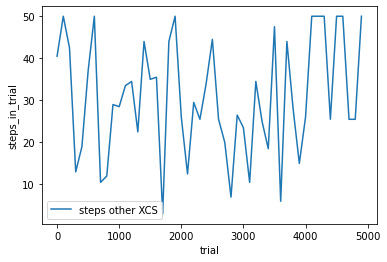

In [8]:
import pandas as pd

ax = other_metrics["steps_in_trial"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

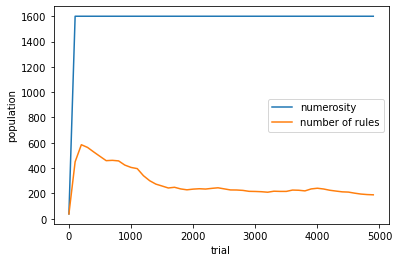

In [9]:
ax = other_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

In [10]:
from lcs.agents.xcs import Configuration

cfg = Configuration(
    number_of_actions=algorithm.minimum_actions,
    metrics_trial_frequency=100,
    covering_wildcard_chance=1-algorithm.wildcard_probability,
    max_population=algorithm.max_population_size,
    learning_rate=algorithm.learning_rate,
    alpha=algorithm.accuracy_coefficient,
    epsilon_0=algorithm.error_threshold,
    v=algorithm.accuracy_power,
    gamma=algorithm.discount_factor,
    ga_threshold=algorithm.ga_threshold,
    chi=algorithm.crossover_probability,
    mutation_chance=algorithm.mutation_probability,
    deletion_threshold=algorithm.deletion_threshold,
    delta=algorithm.fitness_threshold,
    subsumption_threshold=algorithm.subsumption_threshold,
    initial_prediction=algorithm.initial_prediction,
    initial_error=algorithm.initial_error,
    initial_fitness=algorithm.initial_fitness,
    epsilon=algorithm.exploration_probability,
    user_metrics_collector_fcn=xcs_metrics)



In [11]:
my_metrics = avg_experiment(scenario,
                    cfg,
                    number_of_tests=2,
                    explore_trials=exploration_cycles,
                    exploit_metrics=exploitation_cycles,
                    )


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [4429.263296045312, 4268.990784365857, 2171.917173908275, 8829.352652407491, 1183.5137504799286, 2482.4819566126384, 680.1974338999935, 1391.253117986195], 'perf_time': 0.010414100000048165, 'population': 40, 'numerosity': 54}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [5.518614571945693e+150, 9.854184525662187e+150, 7.181483152915087e+150, 2.1814126168396726e+150, 1.0867856081875847e+151, 2.0313688752866017e+150, 1.901857162528952e+150, 9.994882928012185e+149], 'perf_time': 0.0738479000000325, 'population': 255, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 1, 'reward': [6.724339479090068e+292, 2.845688970037532e+292, 1.9325090034701945e+292, 8.92757425665541e+292, 3.1568230456726946e+292, 1.2815753127647683e+293, 9.897111912342824e+292, 3.6181884293877315e+291], 'perf_time': 0.001967400000012276, 'population': 280, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 30, 'reward': [0, 0, 0, 0, 0, 0, 0, 0], 'perf_time': 0.031803399999944304, 'population': 281, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [0, 0, 0, 0, 0, 0, 0, 0], 'perf_time': 0.07496399999990899, 'population': 258, 'num

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 19, 'reward': [1.3251966923189218e+131, 5.552054722263121e+131, 1.027639875967259e+131, 4.440017893493265e+131, 1.3248355831216548e+131, 1.2518911266607625e+130, 1.5450239169071087e+131, 2.377799474764443e+131], 'perf_time': 0.023163699999940945, 'population': 238, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': [6.100520476058179e+276, 1.2006426607986346e+278, 5.670030322973418e+277, 8.426437798922856e+277, 2.598497604070989e+278, 1.9097488454859598e+278, 4.908211183333298e+278, 2.947945250917757e+278], 'perf_time': 0.06282840000005763, 'population': 274, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': [0, 0, 0, 0, 0, 0, 0, 0], 'perf_time': 0.07717020000006869, 'population': 289, 'numerosity': 1600}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 26, 'reward': [0, 0, 0, 0, 0, 0, 0, 0], 'perf_time': 0.02498820000005253, 'population': 268, 'nu

In [12]:
display(my_metrics)

,steps_in_trial,perf_time,population,numerosity
trial,,,,
0,50.0,0.012679,60.0,67.0
100,26.0,0.025564,193.0,1600.0
200,30.0,0.038851,216.5,1600.0
300,31.5,0.034787,225.5,1600.0
400,34.5,0.048506,246.5,1600.0
500,18.0,0.020850,259.0,1600.0
600,26.5,0.025193,265.0,1600.0
700,25.5,0.042522,273.5,1600.0
800,25.5,0.032398,277.0,1600.0


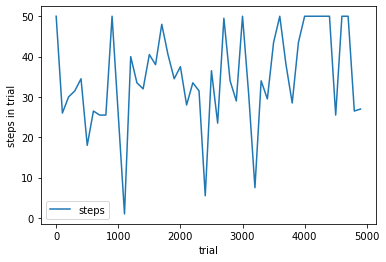

In [13]:
import pandas as pd

ax = my_metrics['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])

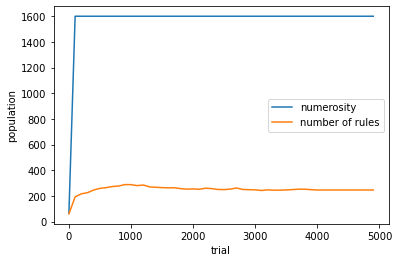

In [14]:
ax = my_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])